[[4.498337 ]
 [2.9967053]]


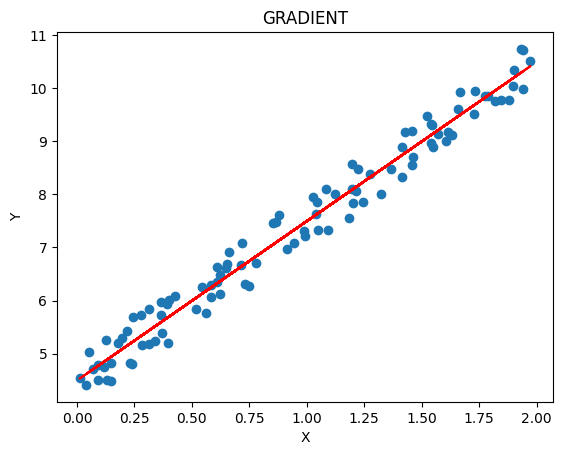

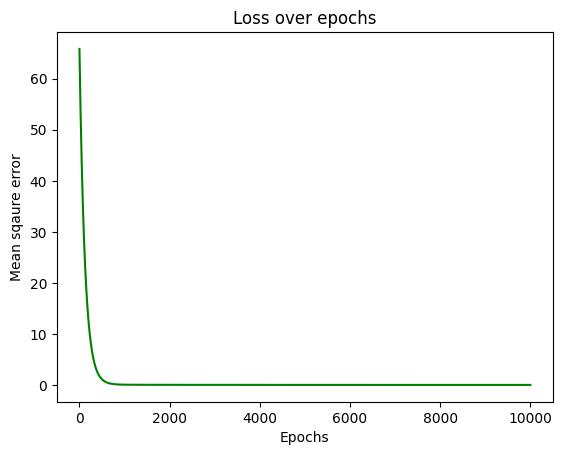

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

np.random.seed(42)
X = 2*np.random.rand(100,1)
Y = 4 + 3*X + np.random.rand(100,1)

X_b = np.c_[np.ones((100,1)),X]
x_tensor = tf.constant(X_b,dtype=tf.float32)
y_tensor = tf.constant(Y,dtype=tf.float32)

tf.random.set_seed(42)
theta = tf.Variable(tf.random.normal(shape=(2,1)))

def LogReg(X,thetha):
  return tf.matmul(X,thetha)
def mse(y_true,y_pred):
  return tf.reduce_mean(tf.square(y_true-y_pred))

lr = 0.001
iters=10000
Loss=[]

for _ in range(iters):
  with tf.GradientTape() as tape:
    y_pred = LogReg(x_tensor,theta)
    loss = mse(y_tensor,y_pred)
  gradients = tape.gradient(loss,[theta])[0]
  theta.assign(theta-lr*gradients)
  Loss.append(loss.numpy())

print(theta.numpy())



plt.scatter(X,Y)
plt.plot(X,theta[0]+theta[1]*X,color="red")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("GRADIENT")
plt.show()


plt.plot(range(iters),Loss,color="green")
plt.xlabel('Epochs')
plt.ylabel('Mean sqaure error')
plt.title("Loss over epochs")
plt.show()